<a href="https://colab.research.google.com/github/shivanggarg1998/Suggestion-Mining/blob/master/RnnWord2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# FOR PLOTTING GRAPHS
import matplotlib.pyplot as plt

# LIBRARIES FOR THE RNN CLASSIFIER
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer

# FOR EVALUATION METRICS OF THE PREDICTIONS
from sklearn.metrics import accuracy_score,f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pickle

variables = pickle.load(open('./drive/My Drive/tempData/variablesword2Vec126','rb'))

test_sequence  = variables['test_sequence']
valid_sequence  = variables['valid_sequence']
train_sequence  = variables['train_sequence']

y_train  = variables['y_train']
y_test  = variables['y_test']
y_valid  = variables['y_valid']

MXSEQLEN  = variables['MXSEQLEN']
EMBEDDING_DIM  = variables['EMBEDDING_DIM']
train_embedding_weights  = variables['train_embedding_weights']
train_word_index  = variables['train_word_index']

In [0]:
def RNN(embedding_weights,num_words):
    
    # THE INPUT LAYER
    sequence_input      =   Input(shape=(MXSEQLEN,), dtype='int32')
    
    # THE EMBEDDING LAYER OF EMBEDDING_WEIGHTS     
    embedding_layer = Embedding(
        num_words,                  # VOCABULARY SIZE
        EMBEDDING_DIM,              # ONE HOT ENCODING VECTOR SIZE
        weights=[embedding_weights],# EMBEGGING WEIGHTS FROM THE GOOGLE NEW WORD VECTOR
        input_length=MXSEQLEN,      # MAX LENGTH OF A SEQUENCE
        trainable=False             # PARAMETERS WILL NOT BE TRAINED
    )
    
    # THE EMBEDDING SEQUENCES FROM THE EMBEDDING LAYER 
    embedded_sequences  =   embedding_layer(sequence_input)

    # ADDING ONE LSTM LAYER OF 256 NODES
    lstm_layer = LSTM(256)(embedded_sequences)                    
    
    # DENSE NEURON LAYER
    next_layer = Dense(128, activation='relu')(lstm_layer)        
    
    # FEW DROPOUTS FOR AVOIDING OVERFIT
    next_layer = Dropout(0.4)(next_layer)                         

    next_layer = Dense(64, activation='relu')(next_layer)        

    # FINAL DENSE LAYER
    preds = Dense(1, activation='sigmoid')(next_layer)  

    model = Model(sequence_input, preds)
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['acc']
    )
    
    model.summary()
    return model

In [54]:
rnn_model = RNN(train_embedding_weights, len(train_word_index)+1)

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 126)]             0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 126, 300)          1146000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 256)               570368    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65  

In [55]:
EPOCHS = 8
BATCH_SIZE = 30

history = rnn_model.fit(
    train_sequence,       # THE INPUT SEQUENCES TO THE MODEL
    y_train,              # TARGET OUTPUT
    epochs=EPOCHS,    
    validation_data=(valid_sequence, y_valid), 
    shuffle=True, 
    batch_size=BATCH_SIZE
)

Epoch 1/8
284/284 [==============================] - 4s 14ms/step - loss: 0.4637 - acc: 0.7859 - val_loss: 0.2363 - val_acc: 0.9088
Epoch 2/8
284/284 [==============================] - 4s 13ms/step - loss: 0.3587 - acc: 0.8464 - val_loss: 0.2437 - val_acc: 0.8824
Epoch 3/8
284/284 [==============================] - 4s 13ms/step - loss: 0.3214 - acc: 0.8632 - val_loss: 0.1994 - val_acc: 0.9244
Epoch 4/8
284/284 [==============================] - 4s 13ms/step - loss: 0.2956 - acc: 0.8727 - val_loss: 0.2292 - val_acc: 0.8956
Epoch 5/8
284/284 [==============================] - 4s 13ms/step - loss: 0.2682 - acc: 0.8855 - val_loss: 0.2239 - val_acc: 0.8944
Epoch 6/8
284/284 [==============================] - 4s 13ms/step - loss: 0.2476 - acc: 0.8958 - val_loss: 0.2009 - val_acc: 0.9172
Epoch 7/8
284/284 [==============================] - 4s 13ms/step - loss: 0.2169 - acc: 0.9102 - val_loss: 0.2473 - val_acc: 0.9016
Epoch 8/8
284/284 [==============================] - 4s 13ms/step - loss: 0.

In [0]:

#####################################################################################
########################## ANALYZING AND TWEAKING THE MODEL##########################
#####################################################################################

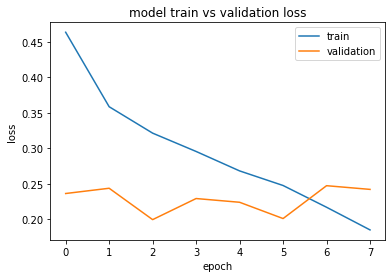

In [56]:
# TRAINING VS VALIDATION LOSS GRAPH
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [57]:
predict=rnn_model.predict(test_sequence)
predict=[int(x+0.5) for x in predict]

# EVLUATING THE ACCURACY
accuracy = accuracy_score(y_test, predict)
f1=f1_score(y_test,predict)
print("F1 Score: %.2f%%" % (f1* 100.0))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

F1 Score: 75.14%
Accuracy: 77.20%
